In [1]:
import os
import time
import sys
import platform
from Lib.YamlFrames import OpenYaml

time_start = time.time()

workpath = os.getcwd()

yaml_path = os.path.join(workpath,'YamlFiles','20210516_2051_w1.yaml')




ListFile = OpenYaml(yaml_path)

sysl = platform.system()
if sysl == "Windows":
    print("OS is Windows")
elif sysl == "Linux":
    print("Os is Linux")
    pass
else:
    pass

if sysl == "Windows":
    wormname = yaml_path.split('\\')[-1]
    wormname = wormname.split(".")[0]
elif sysl == "Linux":
    wormname = yaml_path.split('/')[-1]
    wormname = wormname.split(".")[0]

OS is Windows


In [2]:
from Lib.YamlFrames import YamlFrames
from Lib.YamlFrames import Get_First_Frames,Get_End_Frames,Get_ExperimentTime,Get_DefaultGrid



begin_num1 = Get_First_Frames(ListFile)
end_num = Get_End_Frames(ListFile)
All_Frames_num = end_num-begin_num1+1  # 总的帧数

YamlFiles = YamlFrames(wormname,All_Frames_num)
YamlFiles.ExperimentTime = Get_ExperimentTime(ListFile)
YamlFiles.DefaultGridSizeForNonProtocolIllum = Get_DefaultGrid(ListFile)

print(YamlFiles.ExperimentTime)
print(YamlFiles.DefaultGridSizeForNonProtocolIllum)

 Sun May 16 20:51:33 2021
[[ 20. 100.]]


In [3]:
from Lib.YamlFrames import Get_Any_Frame,Extract_OneFrame
framelist = Get_Any_Frame(ListFile,1) # 提取的一帧的内容

In [4]:

for i in range(0,All_Frames_num):
    framelist = Get_Any_Frame(ListFile,i+1) # 提取的一帧的内容
    frame = Extract_OneFrame(framelist)
    YamlFiles.FrameNumber[i,:] = frame.FrameNumber #internal frame number, not nth recorded frame
    YamlFiles.TimeElapsed[i,:] = frame.TimeElapsed #time since start of experiment (in s) = sElapsed+ 0.001*msRemElapsed
    YamlFiles.BoundaryA[i,0,:] = frame.BoundaryA[0,:] # N*2*100 x,y BoundaryA position in pixels on camera
    YamlFiles.BoundaryA[i,1,:] = frame.BoundaryA[1,:]
    
    YamlFiles.BoundaryB[i,0,:] = frame.BoundaryB[0,:] # N*2*100 x,y BoundaryB position in pixels on camera
    YamlFiles.BoundaryB[i,1,:] = frame.BoundaryB[1,:]
    
    YamlFiles.Centerline[i,0,:] = frame.Centerline[0,:]  # N*2*100 x,y centerline position in pixels on camera
    YamlFiles.Centerline[i,1,:] = frame.Centerline[1,:]
    
    YamlFiles.Head[i,:] = frame.Head[:]  #position in pixels on camera
    YamlFiles.Tail[i,:] = frame.Tail[:]  #position in pixels on camera
    YamlFiles.DLPisOn[i] = frame.DLPisOn #bool whether DLP is active
    
    YamlFiles.FloodLightIsOn[i] = frame.FloodLightIsOn #flood light overrides all other patterns and hits entire fov
    YamlFiles.IllumInvert[i] = frame.IllumInvert #whether pattern is inverted (invert has precedence over floodlight)
    YamlFiles.IllumFlipLR[i] = frame.IllumFlipLR #flips output left/right with respect to worm's body
    YamlFiles.IllumRectOrigin[i,:] = frame.IllumRectOrigin[:] #center of the freehand rectangular illumination in wormspace
    YamlFiles.IllumRectRadius[i,:] = frame.IllumRectRadius[:] #xy value describing dimension of rectangle
    YamlFiles.StageVelocity[i,:] = frame.StageVelocity[:] #velocity sent to stage in stage units/second
    YamlFiles.StagePosition[i,:] = frame.StagePosition[:]
    YamlFiles.StageFeedbackTarget[i,:] = frame.StageFeedbackTarget[:]
    YamlFiles.FirstLaser[i] = frame.FirstLaser
    YamlFiles.SecondLaser[i] = frame.SecondLaser
    YamlFiles.ProtocolIsOn[i] = frame.ProtocolIsOn
    YamlFiles.ProtocolStep[i] =frame.ProtocolStep
    # YamlFiles.LaserPower.append(frame.LaserPower)
time_end = time.time()
print('time cost:',time_end-time_start,'s')

time cost: 14.405996561050415 s


In [5]:
out_path = os.path.join(workpath,'YamlFiles',wormname+'')

In [6]:
print(len(YamlFiles.DLPisOn))

43228


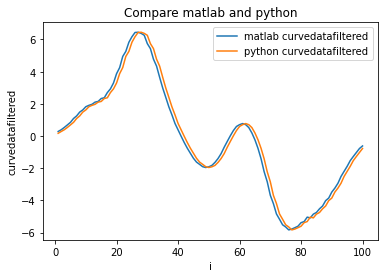

In [20]:


import numpy as np
import matplotlib.pyplot as plt

a = '0.284371475141523	0.392907474407229	0.535406533165936	0.692715913608559	0.851740237821579	1.09092947471516	1.25031895294287	1.48738646088281	1.62260354737324	1.82275370037162	1.90781342690165	1.97130976344881	2.10737172863250	2.15019429781898	2.33212859918696	2.37836978511816	2.70125558774664	2.93230451617640	3.29820981572039	3.87760054734271	4.25252602580764	4.94498476845796	5.25817474242878	5.82605530986053	6.17048884511227	6.43433283056095	6.44872732621742	6.37851371223883	6.25974936758101	5.74191095637020	5.43200701198314	4.77496501244558	4.34707110529453	3.65161700586568	2.98779516358046	2.40576187854680	1.81463812245540	1.31679995478817	0.781725483347007	0.384171199736350	-0.0135870365999003	-0.400382308815961	-0.753933468679073	-1.06828512589627	-1.38076480804100	-1.61762324853658	-1.75742148734329	-1.90315313134684	-1.95369960443384	-1.91006230026087	-1.82270447239024	-1.63642400474654	-1.39577151547336	-1.09016016235948	-0.694597886031887	-0.333335643100883	0.0189938863858563	0.343333345557837	0.596360647285752	0.707508098918508	0.776116594332383	0.707869544515378	0.527551487753222	0.194861357159457	-0.233086889728851	-0.765967131330596	-1.41465208788848	-2.21712062183979	-2.83674086673837	-3.67869800556191	-4.19318695203876	-4.83907358368748	-5.16954275139046	-5.51257053500047	-5.64737794815719	-5.83045046258737	-5.77646260000611	-5.69156884372812	-5.60057557950939	-5.38021020404970	-5.31229342478582	-5.03715931465809	-5.08221536754842	-4.85031956413653	-4.74849005022927	-4.52000326669866	-4.34602261490411	-4.01228228154405	-3.85289880870392	-3.48026942741037	-3.23326905592997	-2.93308671297250	-2.50995060658910	-2.19351410232320	-1.87970603246544	-1.52635014918897	-1.26883502010696	-1.02059824290900	-0.773535282283748	-0.614271073985973'
b = a.split('	')
c = np.zeros((1,100)).flatten()
for i in range(0,100):
    c[0,i] = float(b[i])


x = np.linspace(1,100,100,endpoint=True)
plt.title('Compare matlab and python')
plt.plot(x,c[0,:],label='matlab curvedatafiltered')
plt.plot(x,curvedatafiltered[:],label='python curvedatafiltered')
plt.legend()
plt.xlabel('i')
plt.ylabel('curvedatafiltered')
plt.show()

In [156]:
import numpy as np
from csaps import csaps
from scipy import interpolate
import scipy.ndimage
worm_length = 0

numcurvepts = 100
proximity = 50
spline_p = 0.0005
flip=0
timefilter = 5
bodyfilter =10

centerline = YamlFiles.Centerline #列差分计算，相邻点做差分
centerline1 = centerline[0,:,:]
df = np.diff(centerline1)
df1 = df*df
dfs = np.sqrt(np.dot([1,1],df1))
dft = dfs.reshape(1,len(dfs))
t0 = np.insert(dft,0,0)
t = np.cumsum(t0)
tt = t.reshape(1,len(t))
worm_length=worm_length+t[-1]

cv0 = csaps(t,centerline1,smooth = spline_p)
cv2 = cv0(t)
df2 = np.diff(cv2)

df2s = np.sqrt(np.dot([1,1],df2*df2))
dft = df2s.reshape(1,len(df2s))
splen = np.cumsum(np.insert(dft,0,0)).reshape(1,100)
# cv2 = np.interp(splen+0.00001*np.linspace(0,splen.size-1,splen.size,endpoint=True,dtype=float),cv2.transpose().reshape(100,2),(np.linspace(0,splen[0,-1]-1,102)).reshape(1,102))

cv2i0 = splen+0.00001*np.linspace(0,splen.size-1,splen.size,endpoint=True,dtype=float)
cv2i1 = cv2
cv2i2 = (np.linspace(0,splen[0,-1]-1,102)).reshape(1,102)
cv2i = interpolate.interp1d(cv2i0.reshape(100,),cv2i1,bounds_error=False)
# df*df
# t = cumsum([0,np.sqrt(np.array([1,1])*(df*df))])
newcv = np.array([cv2i(cv2i2)[0,0,:],cv2i(cv2i2)[1,0,:]]).reshape(2,102)

dfcv2= np.diff(newcv)
atdf2 = np.arctan2(-dfcv2[1,:],dfcv2[0,:])
angle = np.unwrap(atdf2)
curve = (np.unwrap(np.diff(angle))).reshape(1,100)

kernel = np.ones((timefilter,bodyfilter), np.float32)/(timefilter*bodyfilter)
curvedatafiltered = scipy.ndimage.correlate(curve*100, kernel, mode='nearest')


In [118]:
from scipy.interpolate import PchipInterpolator as PCHIP
x = np.array([1,2,3,4,5,6])
y = np.array([-1,-1,0,1,1,1])
pchip = PCHIP(x,y)
x_new = np.array([2.5,3.5,4.5])
y_new = pchip.__call__(x_new)
print(y_new)

[-0.625  0.625  1.   ]


In [120]:
from scipy.interpolate import PchipInterpolator as PCHIP
cv2i0 = splen+0.00001*np.linspace(0,splen.size-1,splen.size,endpoint=True,dtype=float)
cv2i1 = cv2
cv2i2 = (np.linspace(0,splen[0,-1]-1,102)).reshape(1,102)
pchip = PCHIP(cv2i0,cv2i1[0,:])

# (cv2i0.shape[1],) + (1,)*(cv2i1.ndim-1)
y_new = pchip.__call__(cv2i2)


ValueError: `x` must be 1-dimensional.

In [81]:
cc = (np.linspace(0,splen[0,-1]-1,102)).reshape(1,102)

In [27]:
a = np.array([[1,2],[2,3]])
a*a

array([[1, 4],
       [4, 9]])